<a href="https://colab.research.google.com/github/tsholofelo-mokheleli/ACIS-2023-New-Zealand/blob/main/Experiment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Imbalance Techniques Experiment**

**Choose Imbalance Techniques:**
1. Resampling Methods:
  * Oversampling
    * SMOTE
    * ADASYN
  * Undersampling
    * Tomek links
    * Near Miss

2. Ensemble Techniques:
  * Random Forest
  * Boosting algorithms

3. Algorithm-specific Methods
  * XGBoost
  * LightGBM

4. Cost-sensitive Learning

In [168]:
# Load the libraries

import pandas  as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import time
import psutil
import os

# Warning filter

import warnings
warnings.filterwarnings('ignore')
cmap=sns.color_palette('Blues_r')

# Metrics

from sklearn.model_selection import train_test_split, cross_val_score,GridSearchCV,cross_validate
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, cohen_kappa_score, confusion_matrix, balanced_accuracy_score
from imblearn.metrics import geometric_mean_score

# Preprocessing

from sklearn.preprocessing import LabelEncoder

# Algorithmns models

from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

from xgboost import XGBClassifier
import lightgbm as lgb

# Ensemble Methods

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier

# Class imbalance

from imblearn.under_sampling import TomekLinks
from imblearn.under_sampling import NearMiss
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import ADASYN

from sklearn.utils import resample

# Plot Theme

sns.set_theme(style="darkgrid")
plt.style.use("ggplot")

**Load Data**

In [169]:
data = pd.read_csv("KNN Imputation Dataset.csv")

**Label Encode, Drop null from target var, and Convert data to Int**

In [170]:
# Initialize LabelEncoder
label_encoder = LabelEncoder()

# make small letters
data['country'] = data['country'].apply(lambda x: x.lower() if isinstance(x, str) else x)

# Fit and transform the countries data
data["country"] = label_encoder.fit_transform(data['country'])

data = data.dropna()

# Convert all columns to int data type
for column in data.columns:
    data[column] = data[column].astype('int64')

In [171]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2189 entries, 0 to 3268
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   self_employed             2189 non-null   int64
 1   no_employees              2189 non-null   int64
 2   tech_company              2189 non-null   int64
 3   company_role              2189 non-null   int64
 4   benefits                  2189 non-null   int64
 5   care_options              2189 non-null   int64
 6   wellness_program          2189 non-null   int64
 7   seek_help                 2189 non-null   int64
 8   anonymity                 2189 non-null   int64
 9   leave                     2189 non-null   int64
 10  mental_importance         2189 non-null   int64
 11  neg_consequence_coworker  2189 non-null   int64
 12  discuss_mh                2189 non-null   int64
 13  work_interfere            2189 non-null   int64
 14  coworkers                 2189 non-null 

In [172]:
data.head()

,self_employed,no_employees,tech_company,company_role,benefits,care_options,wellness_program,seek_help,anonymity,leave,...,supervisor,mental_health_interview,family_history,past_mental_health,mental_health,mental_health_diagnosed,treatment,age,gender,country
0,0,2,1,0,3,0,0,0,2,1,...,2,2,0,1,0,1,0,39,0,77
1,0,1,1,1,0,1,1,1,1,2,...,2,0,1,1,1,1,1,29,0,78
2,0,1,1,1,0,1,0,0,2,3,...,2,1,0,2,0,0,1,38,0,77
3,1,3,0,1,0,1,0,0,1,2,...,2,2,0,1,1,1,1,43,0,77
4,0,1,0,1,1,1,0,0,0,3,...,2,0,1,1,1,1,1,43,1,78


## **Split Dataset**

In [173]:
X = data.drop(["mental_health_diagnosed"], axis=1)
y = data['mental_health_diagnosed']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,stratify=y, random_state=42)

## **Baseline Model**

In [174]:
# Define a list of classifiers
classifiers = {
    "Support Vector Machine": SVC(),
    "Naive Bayes": GaussianNB(),
    "Decision Tree": DecisionTreeClassifier(),
    "Logistic Regression": LogisticRegression()
}

In [175]:
# Dictionary to store evaluation metrics
results = {}

# Loop through each classifier
for name, clf in classifiers.items():
    # Train the classifier
    clf.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = clf.predict(X_test)

    # Calculate evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred)
    kappa = cohen_kappa_score(y_test, y_pred)
    confusion = confusion_matrix(y_test, y_pred)
    geometric_mean = geometric_mean_score(y_test, y_pred)
    balanced_accuracy = balanced_accuracy_score(y_test, y_pred)

    # Store the results in the dictionary
    results[name] = {
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1 Score": f1,
        "ROC AUC": roc_auc,
        "Kappa": kappa,
        "Geometric Mean": geometric_mean,
        "Balanced Accuracy": balanced_accuracy,
        "Confusion Matrix": confusion
    }

# Display the results
for name, metrics in results.items():
    print(f"--- {name} ---")
    print("Accuracy:", metrics["Accuracy"])
    print("Precision:", metrics["Precision"])
    print("Recall:", metrics["Recall"])
    print("F1 Score:", metrics["F1 Score"])
    print("ROC AUC:", metrics["ROC AUC"])
    print("Kappa:", metrics["Kappa"])
    print("Geometric Mean:", metrics["Geometric Mean"])
    print("Balanced Accuracy:", metrics["Balanced Accuracy"])
    print("Confusion Matrix:")
    print(metrics["Confusion Matrix"])
    print("\n")

--- Support Vector Machine ---
Accuracy: 0.6621004566210046
Precision: 0.6621004566210046
Recall: 1.0
F1 Score: 0.7967032967032966
ROC AUC: 0.5
Kappa: 0.0
Geometric Mean: 0.0
Balanced Accuracy: 0.5
Confusion Matrix:
[[  0 148]
 [  0 290]]


--- Naive Bayes ---
Accuracy: 0.867579908675799
Precision: 0.9202898550724637
Recall: 0.8758620689655172
F1 Score: 0.8975265017667845
ROC AUC: 0.8636067101584343
Kappa: 0.7107528350867605
Geometric Mean: 0.8635197484778119
Balanced Accuracy: 0.8636067101584343
Confusion Matrix:
[[126  22]
 [ 36 254]]


--- Decision Tree ---
Accuracy: 0.8744292237442922
Precision: 0.9151943462897526
Recall: 0.8931034482758621
F1 Score: 0.9040139616055846
ROC AUC: 0.8654706430568501
Kappa: 0.7225741069166456
Geometric Mean: 0.86502939954025
Balanced Accuracy: 0.86547064305685
Confusion Matrix:
[[124  24]
 [ 31 259]]


--- Logistic Regression ---
Accuracy: 0.8949771689497716
Precision: 0.8910256410256411
Recall: 0.9586206896551724
F1 Score: 0.9235880398671097
ROC AUC: 

## **Apply Imbalance Techniques**

**Explore the class distribution**

In [176]:
class_counts = data['mental_health_diagnosed'].value_counts()
print(class_counts)

1    1449
0     740
Name: mental_health_diagnosed, dtype: int64


**Visualize the class distribution**

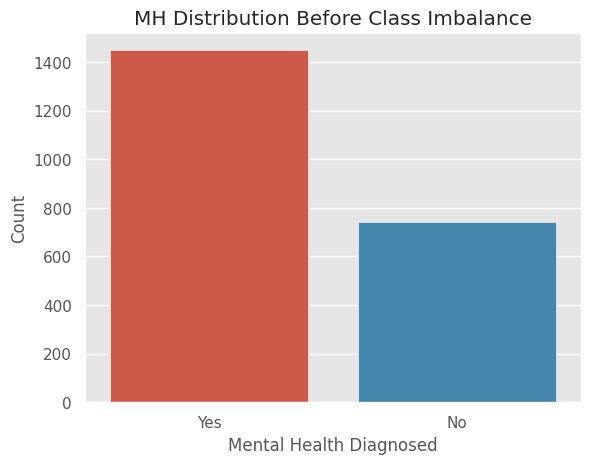

In [177]:
# Create a copy of the original dataset
new_data = data.copy()

mh_mapping = {0: 'No', 1: 'Yes'}
new_data['mh_label'] = new_data['mental_health_diagnosed'].map(mh_mapping)

# Plot the distribution based on the new dataset
sns.countplot(data=new_data, x='mh_label')
plt.xlabel('Mental Health Diagnosed')
plt.ylabel('Count')
plt.title('MH Distribution Before Class Imbalance')
plt.show()

### **Resampling Methods**

##### **1. Synthetic Minority Over-sampling Technique (SMOTE)**

In [178]:
# Apply SMOTE to balance the dataset
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

smote_counts = y_train_resampled.value_counts()
print(smote_counts)

1    1159
0    1159
Name: mental_health_diagnosed, dtype: int64


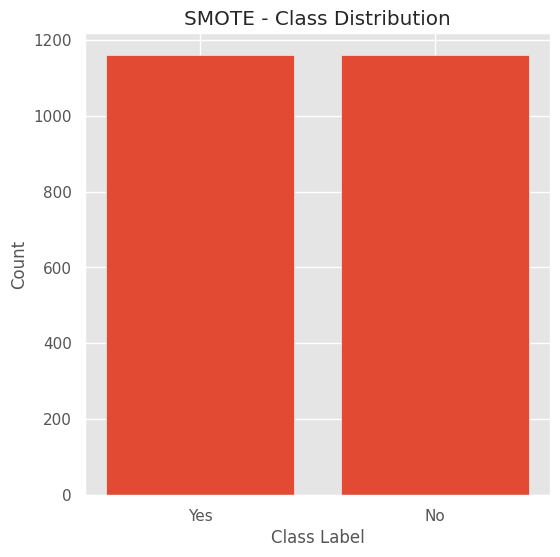

In [179]:
smote_counts.index = smote_counts.index.map({1: 'Yes', 0: 'No'})

plt.figure(figsize=(6, 6))
plt.bar(smote_counts.index, smote_counts.values)
plt.xlabel('Class Label')
plt.ylabel('Count')
plt.title('SMOTE - Class Distribution')
plt.show()

In [180]:
# Dictionary to store evaluation metrics
results = {}

# Loop through each classifier
for name, clf in classifiers.items():
    # Train the classifier
    clf.fit(X_train_resampled, y_train_resampled)

    # Make predictions on the test set
    y_pred = clf.predict(X_test)

    # Calculate evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred)
    kappa = cohen_kappa_score(y_test, y_pred)
    confusion = confusion_matrix(y_test, y_pred)
    geometric_mean = geometric_mean_score(y_test, y_pred)
    balanced_accuracy = balanced_accuracy_score(y_test, y_pred)

    # Store the results in the dictionary
    results[name] = {
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1 Score": f1,
        "ROC AUC": roc_auc,
        "Kappa": kappa,
        "Geometric Mean": geometric_mean,
        "Balanced Accuracy": balanced_accuracy,
        "Confusion Matrix": confusion
    }

# Display the results
for name, metrics in results.items():
    print(f"--- {name} ---")
    print("Accuracy:", metrics["Accuracy"])
    print("Precision:", metrics["Precision"])
    print("Recall:", metrics["Recall"])
    print("F1 Score:", metrics["F1 Score"])
    print("ROC AUC:", metrics["ROC AUC"])
    print("Kappa:", metrics["Kappa"])
    print("Geometric Mean:", metrics["Geometric Mean"])
    print("Balanced Accuracy:", metrics["Balanced Accuracy"])
    print("Confusion Matrix:")
    print(metrics["Confusion Matrix"])
    print("\n")

--- Support Vector Machine ---
Accuracy: 0.769406392694064
Precision: 0.8269896193771626
Recall: 0.8241379310344827
F1 Score: 0.8255613126079447
ROC AUC: 0.7431500465983225
Kappa: 0.48549696448093793
Geometric Mean: 0.7387238687991907
Balanced Accuracy: 0.7431500465983225
Confusion Matrix:
[[ 98  50]
 [ 51 239]]


--- Naive Bayes ---
Accuracy: 0.8698630136986302
Precision: 0.9175627240143369
Recall: 0.8827586206896552
F1 Score: 0.8998242530755711
ROC AUC: 0.8636766076421248
Kappa: 0.7143543626003982
Geometric Mean: 0.8634657835526911
Balanced Accuracy: 0.863676607642125
Confusion Matrix:
[[125  23]
 [ 34 256]]


--- Decision Tree ---
Accuracy: 0.8812785388127854
Precision: 0.9190140845070423
Recall: 0.9
F1 Score: 0.9094076655052264
ROC AUC: 0.8722972972972973
Kappa: 0.737276796013473
Geometric Mean: 0.8718572905786446
Balanced Accuracy: 0.8722972972972973
Confusion Matrix:
[[125  23]
 [ 29 261]]


--- Logistic Regression ---
Accuracy: 0.8926940639269406
Precision: 0.8957654723127035
Re

##### **2. Adaptive Synthetic  (ADASYN)**

In [181]:
adasyn = ADASYN(random_state=42)
X_train_resampled, y_train_resampled = adasyn.fit_resample(X_train, y_train)

adasyn_counts = y_train_resampled.value_counts()
print(adasyn_counts)

1    1159
0    1152
Name: mental_health_diagnosed, dtype: int64


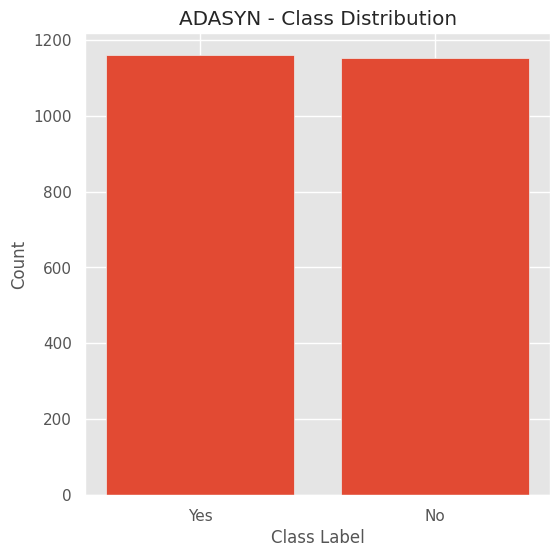

In [182]:
adasyn_counts.index = adasyn_counts.index.map({1: 'Yes', 0: 'No'})

plt.figure(figsize=(6, 6))
plt.bar(adasyn_counts.index, adasyn_counts.values)
plt.xlabel('Class Label')
plt.ylabel('Count')
plt.title('ADASYN - Class Distribution')
plt.xticks(adasyn_counts.index)
plt.show()

In [183]:
# Dictionary to store evaluation metrics
results = {}

# Loop through each classifier
for name, clf in classifiers.items():
    # Train the classifier
    clf.fit(X_train_resampled, y_train_resampled)

    # Make predictions on the test set
    y_pred = clf.predict(X_test)

    # Calculate evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred)
    kappa = cohen_kappa_score(y_test, y_pred)
    confusion = confusion_matrix(y_test, y_pred)
    geometric_mean = geometric_mean_score(y_test, y_pred)
    balanced_accuracy = balanced_accuracy_score(y_test, y_pred)

    # Store the results in the dictionary
    results[name] = {
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1 Score": f1,
        "ROC AUC": roc_auc,
        "Kappa": kappa,
        "Geometric Mean": geometric_mean,
        "Balanced Accuracy": balanced_accuracy,
        "Confusion Matrix": confusion
    }

# Display the results
for name, metrics in results.items():
    print(f"--- {name} ---")
    print("Accuracy:", metrics["Accuracy"])
    print("Precision:", metrics["Precision"])
    print("Recall:", metrics["Recall"])
    print("F1 Score:", metrics["F1 Score"])
    print("ROC AUC:", metrics["ROC AUC"])
    print("Kappa:", metrics["Kappa"])
    print("Geometric Mean:", metrics["Geometric Mean"])
    print("Balanced Accuracy:", metrics["Balanced Accuracy"])
    print("Confusion Matrix:")
    print(metrics["Confusion Matrix"])
    print("\n")

--- Support Vector Machine ---
Accuracy: 0.776255707762557
Precision: 0.8178807947019867
Recall: 0.8517241379310345
F1 Score: 0.8344594594594595
ROC AUC: 0.7400512581547064
Kappa: 0.4898259960064657
Geometric Mean: 0.7315770859033419
Balanced Accuracy: 0.7400512581547065
Confusion Matrix:
[[ 93  55]
 [ 43 247]]


--- Naive Bayes ---
Accuracy: 0.865296803652968
Precision: 0.9230769230769231
Recall: 0.8689655172413793
F1 Score: 0.8952042628774423
ROC AUC: 0.8635368126747437
Kappa: 0.707186076551771
Geometric Mean: 0.8635197484778119
Balanced Accuracy: 0.8635368126747437
Confusion Matrix:
[[127  21]
 [ 38 252]]


--- Decision Tree ---
Accuracy: 0.8698630136986302
Precision: 0.9087719298245615
Recall: 0.8931034482758621
F1 Score: 0.9008695652173914
ROC AUC: 0.8587138863000933
Kappa: 0.7115424610051992
Geometric Mean: 0.8580249976263653
Balanced Accuracy: 0.8587138863000932
Confusion Matrix:
[[122  26]
 [ 31 259]]


--- Logistic Regression ---
Accuracy: 0.8904109589041096
Precision: 0.88782

##### **Tomek Links Under Sampling (TLUS)**

In [184]:
tl = TomekLinks()
X_train_resampled, y_train_resampled = tl.fit_resample(X_train, y_train)

tl_counts = y_train_resampled.value_counts()
print(tl_counts)

1    1087
0     592
Name: mental_health_diagnosed, dtype: int64


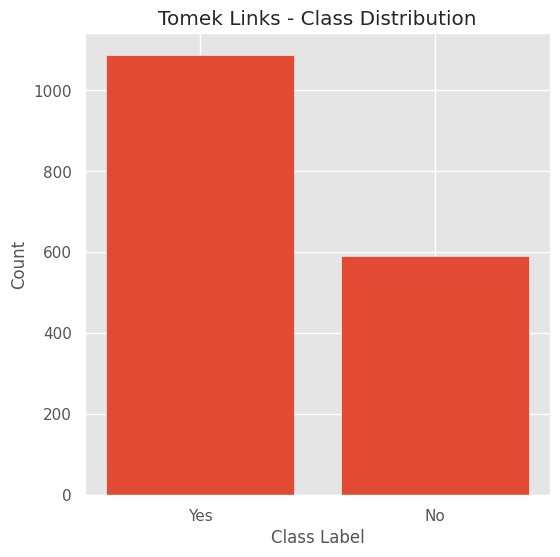

In [185]:
tl_counts.index = tl_counts.index.map({1: 'Yes', 0: 'No'})

plt.figure(figsize=(6, 6))
plt.bar(tl_counts.index, tl_counts.values)
plt.xlabel('Class Label')
plt.ylabel('Count')
plt.title('Tomek Links - Class Distribution')
plt.show()

In [186]:
# Dictionary to store evaluation metrics
results = {}

# Loop through each classifier
for name, clf in classifiers.items():
    # Train the classifier
    clf.fit(X_train_resampled, y_train_resampled)

    # Make predictions on the test set
    y_pred = clf.predict(X_test)

    # Calculate evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred)
    kappa = cohen_kappa_score(y_test, y_pred)
    confusion = confusion_matrix(y_test, y_pred)
    geometric_mean = geometric_mean_score(y_test, y_pred)
    balanced_accuracy = balanced_accuracy_score(y_test, y_pred)

    # Store the results in the dictionary
    results[name] = {
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1 Score": f1,
        "ROC AUC": roc_auc,
        "Kappa": kappa,
        "Geometric Mean": geometric_mean,
        "Balanced Accuracy": balanced_accuracy,
        "Confusion Matrix": confusion
    }

# Display the results
for name, metrics in results.items():
    print(f"--- {name} ---")
    print("Accuracy:", metrics["Accuracy"])
    print("Precision:", metrics["Precision"])
    print("Recall:", metrics["Recall"])
    print("F1 Score:", metrics["F1 Score"])
    print("ROC AUC:", metrics["ROC AUC"])
    print("Kappa:", metrics["Kappa"])
    print("Geometric Mean:", metrics["Geometric Mean"])
    print("Balanced Accuracy:", metrics["Balanced Accuracy"])
    print("Confusion Matrix:")
    print(metrics["Confusion Matrix"])
    print("\n")

--- Support Vector Machine ---
Accuracy: 0.6963470319634704
Precision: 0.6864608076009501
Recall: 0.996551724137931
F1 Score: 0.8129395218002812
ROC AUC: 0.5523299161230195
Kappa: 0.13361492013444776
Geometric Mean: 0.32823059200571936
Balanced Accuracy: 0.5523299161230195
Confusion Matrix:
[[ 16 132]
 [  1 289]]


--- Naive Bayes ---
Accuracy: 0.863013698630137
Precision: 0.9197080291970803
Recall: 0.8689655172413793
F1 Score: 0.8936170212765957
ROC AUC: 0.8601584342963653
Kappa: 0.7017432358816053
Geometric Mean: 0.860113345659265
Balanced Accuracy: 0.8601584342963653
Confusion Matrix:
[[126  22]
 [ 38 252]]


--- Decision Tree ---
Accuracy: 0.8858447488584474
Precision: 0.9081632653061225
Recall: 0.9206896551724137
F1 Score: 0.9143835616438356
ROC AUC: 0.8691286113699906
Kappa: 0.7431747818744723
Geometric Mean: 0.8675978341742981
Balanced Accuracy: 0.8691286113699906
Confusion Matrix:
[[121  27]
 [ 23 267]]


--- Logistic Regression ---
Accuracy: 0.8949771689497716
Precision: 0.893

##### **Near Miss Under Sampling (NMUS)**

In [187]:
nm = NearMiss()
X_train_resampled, y_train_resampled = nm.fit_resample(X_train, y_train)

nm_counts = y_train_resampled.value_counts()
print(nm_counts)

0    592
1    592
Name: mental_health_diagnosed, dtype: int64


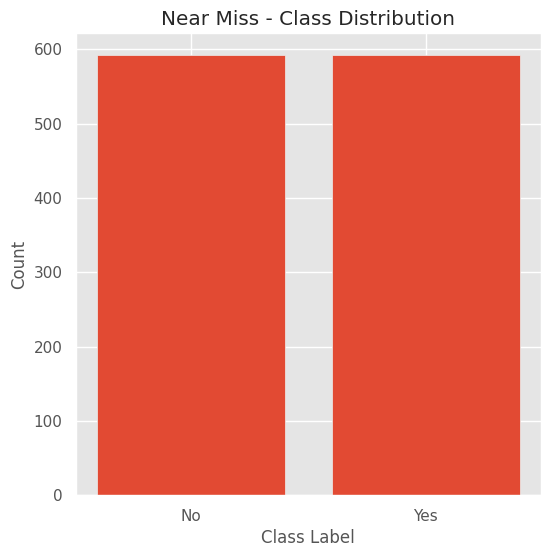

In [188]:
nm_counts.index = nm_counts.index.map({1: 'Yes', 0: 'No'})

plt.figure(figsize=(6, 6))
plt.bar(nm_counts.index, nm_counts.values)
plt.xlabel('Class Label')
plt.ylabel('Count')
plt.title('Near Miss - Class Distribution')
plt.show()

In [189]:
# Dictionary to store evaluation metrics
results = {}

# Loop through each classifier
for name, clf in classifiers.items():
    # Train the classifier
    clf.fit(X_train_resampled, y_train_resampled)

    # Make predictions on the test set
    y_pred = clf.predict(X_test)

    # Calculate evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred)
    kappa = cohen_kappa_score(y_test, y_pred)
    confusion = confusion_matrix(y_test, y_pred)
    geometric_mean = geometric_mean_score(y_test, y_pred)
    balanced_accuracy = balanced_accuracy_score(y_test, y_pred)

    # Store the results in the dictionary
    results[name] = {
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1 Score": f1,
        "ROC AUC": roc_auc,
        "Kappa": kappa,
        "Geometric Mean": geometric_mean,
        "Balanced Accuracy": balanced_accuracy,
        "Confusion Matrix": confusion
    }

# Display the results
for name, metrics in results.items():
    print(f"--- {name} ---")
    print("Accuracy:", metrics["Accuracy"])
    print("Precision:", metrics["Precision"])
    print("Recall:", metrics["Recall"])
    print("F1 Score:", metrics["F1 Score"])
    print("ROC AUC:", metrics["ROC AUC"])
    print("Kappa:", metrics["Kappa"])
    print("Geometric Mean:", metrics["Geometric Mean"])
    print("Balanced Accuracy:", metrics["Balanced Accuracy"])
    print("Confusion Matrix:")
    print(metrics["Confusion Matrix"])
    print("\n")

--- Support Vector Machine ---
Accuracy: 0.6872146118721462
Precision: 0.7325227963525835
Recall: 0.8310344827586207
F1 Score: 0.7786752827140548
ROC AUC: 0.618219944082013
Kappa: 0.2527458842868172
Geometric Mean: 0.5804359321997821
Balanced Accuracy: 0.6182199440820131
Confusion Matrix:
[[ 60  88]
 [ 49 241]]


--- Naive Bayes ---
Accuracy: 0.8127853881278538
Precision: 0.940677966101695
Recall: 0.7655172413793103
F1 Score: 0.844106463878327
ROC AUC: 0.8354613233923579
Kappa: 0.6159045215382641
Geometric Mean: 0.8325283468302218
Balanced Accuracy: 0.8354613233923578
Confusion Matrix:
[[134  14]
 [ 68 222]]


--- Decision Tree ---
Accuracy: 0.8013698630136986
Precision: 0.921161825726141
Recall: 0.7655172413793103
F1 Score: 0.8361581920903955
ROC AUC: 0.8185694315004659
Kappa: 0.589366150132546
Geometric Mean: 0.8168484432930901
Balanced Accuracy: 0.8185694315004659
Confusion Matrix:
[[129  19]
 [ 68 222]]


--- Logistic Regression ---
Accuracy: 0.8447488584474886
Precision: 0.9080882

### **Ensemble Techniques**

1. **Random Forest**

*Ensemble methods like Random Forest are indeed effective in handling class imbalance because they combine multiple weak learners (decision trees) to create a robust and accurate model. The inherent nature of Random Forest helps in addressing the class imbalance problem by reducing the risk of overfitting to the majority class and improving generalization to the minority class.*

2. **Boosting Algorithms**

*Boosting algorithms are powerful ensemble methods that can handle class imbalance effectively by giving more emphasis to misclassified instances and focusing on difficult-to-classify samples.  One popular boosting algorithm is AdaBoost (Adaptive Boosting).*

**Random Forest handles class imbalance effectively because of the following reasons:**

1. **Bootstrap Aggregating (Bagging):** Random Forest uses bagging, which means it creates multiple subsets of the training data with replacement. This helps in increasing the representation of the minority class in some of the subsets, making the classifier more robust to imbalanced data.

2. **Feature Randomness:** Random Forest selects a random subset of features to split at each node of the decision trees. This randomness further helps in reducing the dominance of the majority class and can improve the overall performance on the minority class.

3. **Voting Ensemble:** In the testing phase, the ensemble of decision trees in the Random Forest votes on the final classification. Since each decision tree in the forest may have learned from different subsets of data, it provides a more balanced voting mechanism.

4. **Out-of-Bag (OOB) Samples:** Random Forest can also use out-of-bag samples (samples not used during training) to estimate the performance of the model. This helps in getting an unbiased estimate of the model's performance even with imbalanced data.

By combining these mechanisms, Random Forest is well-suited for class imbalance problems and can produce reliable and accurate predictions even in the presence of imbalanced classes.

**AdaBoost handles class imbalance effectively due to the following reasons:**

1. **Weighted Voting:** In AdaBoost, each weak learner (typically decision trees) is assigned a weight based on its accuracy in classifying the training data. Misclassified instances are given higher weights, making subsequent weak learners focus more on correcting those errors.

2. **Iterative Learning:** AdaBoost iteratively trains weak learners, and at each iteration, it gives more attention to misclassified instances from the previous iteration. This way, difficult-to-classify samples receive more emphasis during the learning process.

3. **Ensemble Aggregation:** The final prediction in AdaBoost is made by aggregating the predictions of all weak learners, with more weight given to the ones with better performance on the training data. This ensemble aggregation further helps in handling class imbalance and producing more accurate predictions.

4. **Robustness:** By iteratively adapting to the difficult samples, AdaBoost becomes more robust to imbalanced classes over the course of iterations.

Overall, AdaBoost can effectively handle class imbalance by focusing on misclassified instances and adapting to the challenges posed by imbalanced data. It often outperforms traditional classifiers when dealing with skewed class distributions.

In [190]:
# Define a list of Ensemble classifiers
EnsembleClassifiers = {
    "Adaptive Boosting": AdaBoostClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42)
}

In [191]:
# Dictionary to store evaluation metrics
results = {}

# Loop through each classifier
for name, clf in EnsembleClassifiers.items():
    # Train the classifier
    clf.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = clf.predict(X_test)

    # Calculate evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred)
    kappa = cohen_kappa_score(y_test, y_pred)
    confusion = confusion_matrix(y_test, y_pred)
    geometric_mean = geometric_mean_score(y_test, y_pred)
    balanced_accuracy = balanced_accuracy_score(y_test, y_pred)

    # Store the results in the dictionary
    results[name] = {
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1 Score": f1,
        "ROC AUC": roc_auc,
        "Kappa": kappa,
        "Geometric Mean": geometric_mean,
        "Balanced Accuracy": balanced_accuracy,
        "Confusion Matrix": confusion
    }

# Display the results
for name, metrics in results.items():
    print(f"--- {name} ---")
    print("Accuracy:", metrics["Accuracy"])
    print("Precision:", metrics["Precision"])
    print("Recall:", metrics["Recall"])
    print("F1 Score:", metrics["F1 Score"])
    print("ROC AUC:", metrics["ROC AUC"])
    print("Kappa:", metrics["Kappa"])
    print("Geometric Mean:", metrics["Geometric Mean"])
    print("Balanced Accuracy:", metrics["Balanced Accuracy"])
    print("Confusion Matrix:")
    print(metrics["Confusion Matrix"])
    print("\n")

--- Adaptive Boosting ---
Accuracy: 0.908675799086758
Precision: 0.9166666666666666
Recall: 0.9482758620689655
F1 Score: 0.9322033898305084
ROC AUC: 0.8896784715750233
Kappa: 0.7924662402274343
Geometric Mean: 0.8877466578992962
Balanced Accuracy: 0.8896784715750232
Confusion Matrix:
[[123  25]
 [ 15 275]]


--- Random Forest ---
Accuracy: 0.908675799086758
Precision: 0.9032258064516129
Recall: 0.9655172413793104
F1 Score: 0.9333333333333333
ROC AUC: 0.8814072693383038
Kappa: 0.7889156626506024
Geometric Mean: 0.8773849138466345
Balanced Accuracy: 0.8814072693383038
Confusion Matrix:
[[118  30]
 [ 10 280]]




### **Algorithm-specific Methods**

XGBoost (Extreme Gradient Boosting) is another powerful boosting algorithm that has specific parameters and techniques to handle class imbalance effectively. XGBoost is an enhanced version of Gradient Boosting that leverages a variety of regularization techniques and can handle class imbalance naturally.

We used XGBoost in algorithm specific methods because it had specific parameters or techniques to handle class imbalance.



**XGBoost can handle class imbalance effectively due to the following reasons:**

**scale_pos_weight:** The scale_pos_weight parameter helps in handling class imbalance by assigning higher weights to the minority class during the boosting process. This parameter helps in balancing the effect of class distribution and prevents the model from being biased towards the majority class.

**Regularization:** XGBoost uses L1 and L2 regularization to prevent overfitting, which can be beneficial when dealing with imbalanced data as it reduces the risk of overfitting to the majority class.

**Gradient-based Optimization:** XGBoost employs gradient-based optimization techniques, which allows it to prioritize difficult-to-classify samples during the boosting process, thus making it more robust to imbalanced classes.

Overall, XGBoost is an excellent choice for handling class imbalance, as it provides built-in mechanisms to deal with skewed class distributions while delivering high performance and accurate predictions.

In [192]:
# Create and set up the XGBoost classifier
# You can use scale_pos_weight to handle class imbalance by assigning higher weights to the minority class
# The scale_pos_weight should be set as the ratio of the number of negative (majority) class samples to positive (minority) class samples

scale_pos_weight = len(y_train[y_train == 0]) / len(y_train[y_train == 1])

# Create and set up the LightGBM classifier
# You can use the is_unbalance parameter to handle class imbalance by automatically setting the positive (minority) class weight


AlgorithmSpecific = {
    "XGBoost": XGBClassifier(scale_pos_weight=scale_pos_weight, random_state=42),
    "LightGBM": lgb.LGBMClassifier(is_unbalance=True, random_state=42)
}

In [193]:
# Dictionary to store evaluation metrics
results = {}

# Loop through each classifier
for name, clf in AlgorithmSpecific.items():
    # Train the classifier
    clf.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = clf.predict(X_test)

    # Calculate evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred)
    kappa = cohen_kappa_score(y_test, y_pred)
    confusion = confusion_matrix(y_test, y_pred)
    geometric_mean = geometric_mean_score(y_test, y_pred)
    balanced_accuracy = balanced_accuracy_score(y_test, y_pred)

    # Store the results in the dictionary
    results[name] = {
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1 Score": f1,
        "ROC AUC": roc_auc,
        "Kappa": kappa,
        "Geometric Mean": geometric_mean,
        "Balanced Accuracy": balanced_accuracy,
        "Confusion Matrix": confusion
    }

# Display the results
for name, metrics in results.items():
    print(f"--- {name} ---")
    print("Accuracy:", metrics["Accuracy"])
    print("Precision:", metrics["Precision"])
    print("Recall:", metrics["Recall"])
    print("F1 Score:", metrics["F1 Score"])
    print("ROC AUC:", metrics["ROC AUC"])
    print("Kappa:", metrics["Kappa"])
    print("Geometric Mean:", metrics["Geometric Mean"])
    print("Balanced Accuracy:", metrics["Balanced Accuracy"])
    print("Confusion Matrix:")
    print(metrics["Confusion Matrix"])
    print("\n")

--- XGBoost ---
Accuracy: 0.908675799086758
Precision: 0.9194630872483222
Recall: 0.9448275862068966
F1 Score: 0.9319727891156463
ROC AUC: 0.8913327120223671
Kappa: 0.7931620702682282
Geometric Mean: 0.8897259701487473
Balanced Accuracy: 0.8913327120223672
Confusion Matrix:
[[124  24]
 [ 16 274]]


--- LightGBM ---
Accuracy: 0.9018264840182648
Precision: 0.9102990033222591
Recall: 0.9448275862068966
F1 Score: 0.9272419627749577
ROC AUC: 0.881197576887232
Kappa: 0.7765253090960867
Geometric Mean: 0.8788972587429709
Balanced Accuracy: 0.881197576887232
Confusion Matrix:
[[121  27]
 [ 16 274]]




### **Cost-sensitive Learning**

Assign different misclassification costs to different classes to emphasize the importance of correctly predicting the minority class.

Performing cost-sensitive learning in Colab involves modifying the class weights or sample weights of your machine learning model to take into account the costs associated with misclassifications. The idea is to assign higher weights to the misclassified samples, which encourages the model to focus more on minimizing the cost of misclassifications.

**Define the cost matrix.**

The cost matrix specifies the costs associated with different types of misclassifications. For example, we can assign a higher cost to misclassifying the minority class samples.

In [194]:
# Define the cost matrix
# Replace the values with the actual costs for your problem
# In this experiment, we assume higher costs for misclassifying the minority class (class 1)

cost_matrix = np.array([[0, 1], [10, 0]])

**Modify the class weights or sample weights in the model.**

In this step, we create and train a RandomForestClassifier while taking into account the cost matrix.

In [195]:
# Calculate the class weights from the cost matrix
class_weights = {0: cost_matrix[0, 0], 1: cost_matrix[1, 0]}

In [196]:
CostSensitiveLearning = {
    "Random Forest": RandomForestClassifier(class_weight=class_weights, random_state=42),
    "Decision Tree": DecisionTreeClassifier(class_weight=class_weights, random_state=42),
    "Logistic Regression": LogisticRegression(class_weight=class_weights, random_state=42)
}

In [197]:
# Dictionary to store evaluation metrics
results = {}

# Loop through each classifier
for name, clf in CostSensitiveLearning.items():
    # Train the classifier
    clf.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = clf.predict(X_test)

    # Calculate evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred)
    kappa = cohen_kappa_score(y_test, y_pred)
    confusion = confusion_matrix(y_test, y_pred)
    geometric_mean = geometric_mean_score(y_test, y_pred)
    balanced_accuracy = balanced_accuracy_score(y_test, y_pred)

    # Store the results in the dictionary
    results[name] = {
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1 Score": f1,
        "ROC AUC": roc_auc,
        "Kappa": kappa,
        "Geometric Mean": geometric_mean,
        "Balanced Accuracy": balanced_accuracy,
        "Confusion Matrix": confusion
    }

# Display the results
for name, metrics in results.items():
    print(f"--- {name} ---")
    print("Accuracy:", metrics["Accuracy"])
    print("Precision:", metrics["Precision"])
    print("Recall:", metrics["Recall"])
    print("F1 Score:", metrics["F1 Score"])
    print("ROC AUC:", metrics["ROC AUC"])
    print("Kappa:", metrics["Kappa"])
    print("Geometric Mean:", metrics["Geometric Mean"])
    print("Balanced Accuracy:", metrics["Balanced Accuracy"])
    print("Confusion Matrix:")
    print(metrics["Confusion Matrix"])
    print("\n")

--- Random Forest ---
Accuracy: 0.6621004566210046
Precision: 0.6621004566210046
Recall: 1.0
F1 Score: 0.7967032967032966
ROC AUC: 0.5
Kappa: 0.0
Geometric Mean: 0.0
Balanced Accuracy: 0.5
Confusion Matrix:
[[  0 148]
 [  0 290]]


--- Decision Tree ---
Accuracy: 0.6621004566210046
Precision: 0.6621004566210046
Recall: 1.0
F1 Score: 0.7967032967032966
ROC AUC: 0.5
Kappa: 0.0
Geometric Mean: 0.0
Balanced Accuracy: 0.5
Confusion Matrix:
[[  0 148]
 [  0 290]]


--- Logistic Regression ---
Accuracy: 0.6621004566210046
Precision: 0.6621004566210046
Recall: 1.0
F1 Score: 0.7967032967032966
ROC AUC: 0.5
Kappa: 0.0
Geometric Mean: 0.0
Balanced Accuracy: 0.5
Confusion Matrix:
[[  0 148]
 [  0 290]]




By adjusting the class weights based on the cost matrix, the Classifier will prioritize minimizing the total cost (which includes the cost of misclassifications) during training. This way, the model will be more sensitive to the class imbalance and make better predictions, taking into account the associated costs of misclassification.
